In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
import plotly.express as px
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [57]:
data = pd.read_csv('spam.csv',encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [58]:
#Dropping the unnecessary columns
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
data.drop(columns=columns_to_drop, inplace=True)

In [59]:
#Renaming the columns
new_column_names = {"v1":"Category","v2":"Message"}
data.rename(columns = new_column_names,inplace = True)
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
print(data.shape)
print()
print(data.info())
print()
print(data.isnull().sum())

(5572, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

Category    0
Message     0
dtype: int64


# Data visualization

In [61]:
fig1 = px.pie(values=data['Category'].value_counts(), names=["ham","spam"] , width=700, height=400, 
      color_discrete_sequence=["skyblue","black"], title="Distribution of Mails")

fig1.show()

# Data processing

In [62]:
data.loc[data["Category"] == "spam", "Category"] = 0
data.loc[data["Category"] == "ham", "Category"] = 1

In [63]:
X = data["Message"]
Y = data["Category"]

In [64]:
#Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

print(X.shape,Y.shape)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(5572,) (5572,)
(4457,) (4457,)
(1115,) (1115,)


# Feature extraction

In [65]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [66]:
print(X_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object


In [67]:
print(X_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

## Building the model

In [68]:
model=LogisticRegression()
model.fit(X_train_features,Y_train)

LogisticRegression()

##### Visualizing results

In [69]:
predict_train_data=model.predict(X_train_features)

#Accuracy on trainning data
accuracy_train_data=accuracy_score(Y_train,predict_train_data)
print("Accuracy on trainning data : ",accuracy_train_data*100)

#Accuracy on test data
predict_test_data=model.predict(X_test_features)
accuracy_test_data=accuracy_score(Y_test,predict_test_data)
print("\nAccuracy on test data : ",accuracy_test_data*100)

Accuracy on trainning data :  96.61207089970833

Accuracy on test data :  96.23318385650225


In [70]:
def predict_sms(input_sms, model, feature_extraction):
    new_data_features = feature_extraction.transform(input_sms)
    prediction = model.predict(new_data_features)
    return prediction

input_sms1 = ["Congratulations!! You have won a new Audi A4, claim now by calling on +91-XXXXXXXX, Hurry up"]
input_sms2 = ["Hey, can we get together to watch football game tomorrow?"]

predictions1 = predict_sms(input_sms1, model, feature_extraction)
predictions2 = predict_sms(input_sms2, model, feature_extraction)

def get_label(prediction):
    return "Ham Mail" if prediction[0] == 1 else "Spam Mail"

print("For input_sms1 : ", get_label(predictions1))
print("For input_sms2 : ", get_label(predictions2))


For input_sms1 :  Spam Mail
For input_sms2 :  Ham Mail


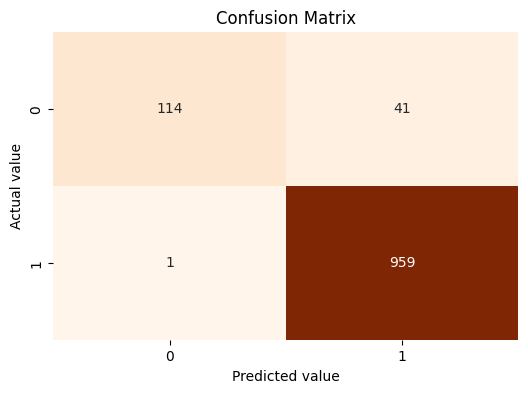

In [71]:
#Confusion matrix
conf_matrix=confusion_matrix(Y_test,predict_test_data)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()